<a href="https://colab.research.google.com/github/kemaldoguoktay/Multivariate-Analysis-of-Fast-Food-Nutrition-Profiles/blob/main/467_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
!pip install pingouin -q
import pingouin as pg
from scipy import stats
from sklearn.decomposition import PCA
from scipy.stats import chi2
from statsmodels.multivariate.manova import MANOVA
from sklearn.cluster import KMeans
!pip install factor_analyzer -q
from factor_analyzer import FactorAnalyzer
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import silhouette_score
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv("FastFoodNutritionMenuV3.csv")

In [6]:
df.head(1)

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5


In [7]:
df.columns

Index(['Company', 'Item', 'Calories', 'Calories from\nFat', 'Total Fat\n(g)',
       'Saturated Fat\n(g)', 'Trans Fat\n(g)', 'Cholesterol\n(mg)',
       'Sodium \n(mg)', 'Carbs\n(g)', 'Fiber\n(g)', 'Sugars\n(g)',
       'Protein\n(g)', 'Weight Watchers\nPnts'],
      dtype='object')

In [8]:
df = df.rename(columns={
    'Calories from\nFat': 'Calories from Fat',
    'Total Fat\n(g)': 'Total Fat',
    'Saturated Fat\n(g)': 'Saturated Fat',
    'Trans Fat\n(g)': 'Trans Fat',
    'Cholesterol\n(mg)': 'Cholesterol',
    'Sodium \n(mg)': 'Sodium',
    'Carbs\n(g)': 'Carbs',
    'Fiber\n(g)': 'Fiber',
    'Sugars\n(g)': 'Sugars',
    'Protein\n(g)': 'Protein',
    'Weight Watchers\nPnts': 'Weight Watchers Pnts'
})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1147 non-null   object
 1   Item                  1147 non-null   object
 2   Calories              1147 non-null   object
 3   Calories from Fat     642 non-null    object
 4   Total Fat             1091 non-null   object
 5   Saturated Fat         1091 non-null   object
 6   Trans Fat             1091 non-null   object
 7   Cholesterol           1147 non-null   object
 8   Sodium                1147 non-null   object
 9   Carbs                 1091 non-null   object
 10  Fiber                 1091 non-null   object
 11  Sugars                1147 non-null   object
 12  Protein               1091 non-null   object
 13  Weight Watchers Pnts  887 non-null    object
dtypes: object(14)
memory usage: 125.6+ KB


In [10]:
print(df.isnull().sum())

Company                   0
Item                      0
Calories                  0
Calories from Fat       505
Total Fat                56
Saturated Fat            56
Trans Fat                56
Cholesterol               0
Sodium                    0
Carbs                    56
Fiber                    56
Sugars                    0
Protein                  56
Weight Watchers Pnts    260
dtype: int64


In [11]:
num_vars = [
    "Calories", "Calories from Fat", "Total Fat", "Saturated Fat",
    "Trans Fat", "Cholesterol", "Sodium", "Carbs", "Fiber",
    "Sugars", "Protein", "Weight Watchers Pnts"
]

In [12]:
for col in num_vars:
  print(col)
  print(df[pd.to_numeric(df[col], errors='coerce').isnull()][col].unique())

Calories
['\xa0']
Calories from Fat
[nan '\xa0']
Total Fat
['\xa0' nan]
Saturated Fat
['\xa0' nan]
Trans Fat
['\xa0' nan]
Cholesterol
['\xa0' '<5']
Sodium
['\xa0' '<1']
Carbs
['\xa0' '<1' nan]
Fiber
['\xa0' '<1' nan]
Sugars
['\xa0' '<1']
Protein
['\xa0' nan]
Weight Watchers Pnts
[nan '\xa0']


In [13]:
df = df.replace('\xa0', np.nan)

In [14]:
df[num_vars] = df[num_vars].replace({'<': ''}, regex=True)

In [15]:
print(df.isnull().sum())

Company                   0
Item                      1
Calories                 14
Calories from Fat       517
Total Fat                68
Saturated Fat            68
Trans Fat                68
Cholesterol              14
Sodium                   14
Carbs                    68
Fiber                    68
Sugars                   14
Protein                  68
Weight Watchers Pnts    271
dtype: int64


In [16]:
for col in num_vars:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1147 non-null   object 
 1   Item                  1146 non-null   object 
 2   Calories              1133 non-null   float64
 3   Calories from Fat     630 non-null    float64
 4   Total Fat             1079 non-null   float64
 5   Saturated Fat         1079 non-null   float64
 6   Trans Fat             1079 non-null   float64
 7   Cholesterol           1133 non-null   float64
 8   Sodium                1133 non-null   float64
 9   Carbs                 1079 non-null   float64
 10  Fiber                 1079 non-null   float64
 11  Sugars                1133 non-null   float64
 12  Protein               1079 non-null   float64
 13  Weight Watchers Pnts  876 non-null    float64
dtypes: float64(12), object(2)
memory usage: 125.6+ KB


In [17]:
numerical_df = df.select_dtypes(include=np.number)

display(numerical_df.head(1))

,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbs,Fiber,Sugars,Protein,Weight Watchers Pnts
0,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5


In [18]:
print(numerical_df.isnull().sum())

Calories                 14
Calories from Fat       517
Total Fat                68
Saturated Fat            68
Trans Fat                68
Cholesterol              14
Sodium                   14
Carbs                    68
Fiber                    68
Sugars                   14
Protein                  68
Weight Watchers Pnts    271
dtype: int64


If i apply imputations to the weight watchers pnts, i'll increase the VIF because i know that WWP is a external scoring system and it is derived from other variables hence i should drop it first.

Also Calories from Fat variable is derived from calories and it has a formula total fat x 9, it means that i cannot use imputations because if i use it will create a perfect multicollinearity. Moreover, it has 44% missing values so we should drop this column too.

In [19]:
df.columns

Index(['Company', 'Item', 'Calories', 'Calories from Fat', 'Total Fat',
       'Saturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium', 'Carbs', 'Fiber',
       'Sugars', 'Protein', 'Weight Watchers Pnts'],
      dtype='object')

In [20]:
df = df.drop(columns=[
    "Calories from Fat",
    "Weight Watchers Pnts"
    ])

In [21]:
# update
numerical_df = df.select_dtypes(include=np.number)

display(numerical_df.head(1))

,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbs,Fiber,Sugars,Protein
0,250.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0


In [22]:
df.head(1)

,Company,Item,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbs,Fiber,Sugars,Protein
0,McDonald’s,Hamburger,250.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0


In [23]:
print(df.isnull().sum())

Company           0
Item              1
Calories         14
Total Fat        68
Saturated Fat    68
Trans Fat        68
Cholesterol      14
Sodium           14
Carbs            68
Fiber            68
Sugars           14
Protein          68
dtype: int64


In [24]:
print("If I drop NA values from rows. Loss percentage:",round(100*df.isnull().any(axis=1).sum()/df.shape[0],2),"%")

If I drop NA values from rows. Loss percentage: 5.93 %


So it is not important a lot, I can drop all.

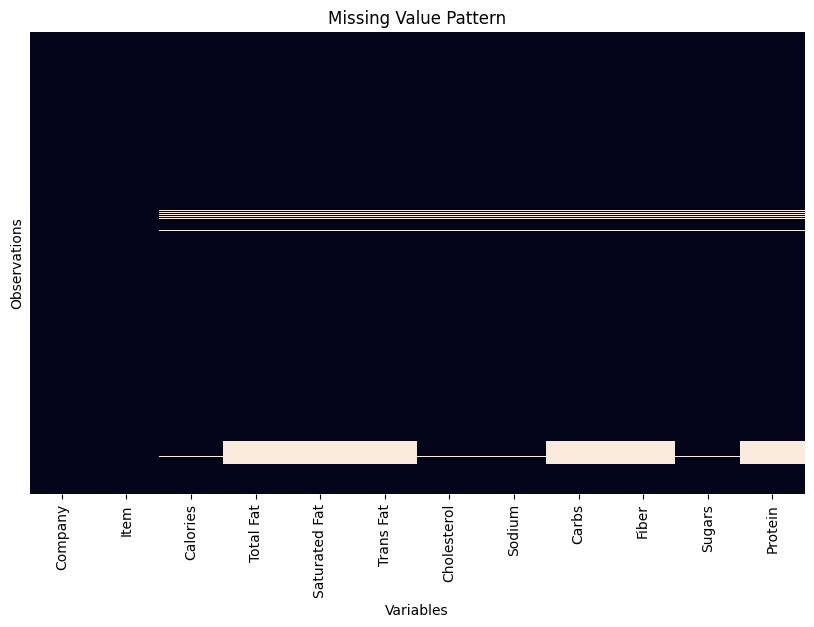

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Value Pattern")
plt.xlabel("Variables")
plt.ylabel("Observations")
plt.show()

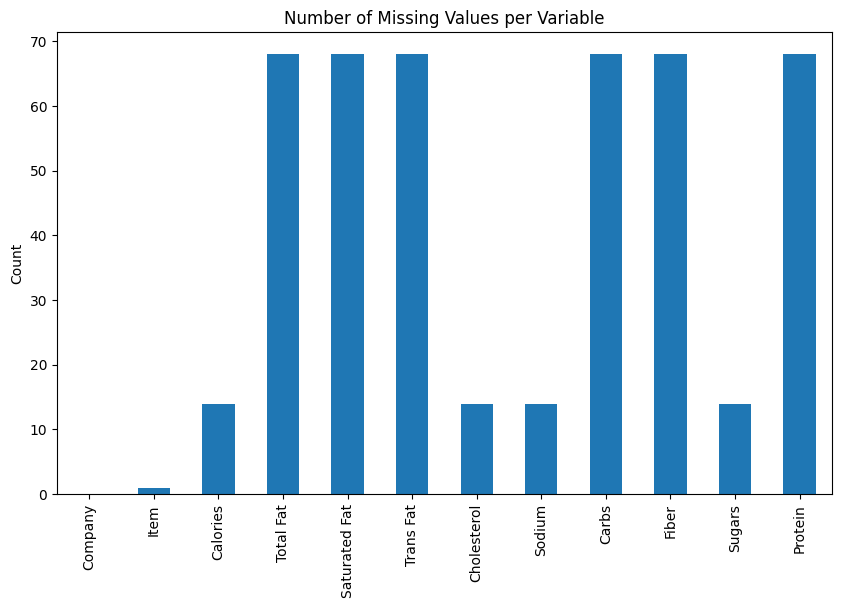

In [26]:
plt.figure(figsize=(10, 6))
df.isnull().sum().plot(kind="bar")
plt.title("Number of Missing Values per Variable")
plt.ylabel("Count")
plt.show()

Row-wise deletion was applied since the number of affected observations was small and missing values were concentrated in the same rows. Data loss is small. No artificial data is created.

In [27]:
# Row-wise deletion
df = df.dropna().reset_index(drop=True)

In [28]:
numerical_df = df.select_dtypes(include=np.number)

In [29]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,1079.0,293.924930,223.447339,0.0,150.0,250.0,400.0,1220.0
Total Fat,1079.0,11.682576,13.957331,0.0,0.0,8.0,18.0,98.0
Saturated Fat,1079.0,4.068119,5.025099,0.0,0.0,3.0,6.0,33.0
Trans Fat,1079.0,0.140871,0.489773,0.0,0.0,0.0,0.0,4.5
Cholesterol,1079.0,36.946247,66.342724,0.0,0.0,15.0,40.0,575.0
Sodium,1079.0,446.672845,501.095373,0.0,80.0,210.0,705.0,2890.0
Carbs,1079.0,38.911029,31.661203,0.0,17.0,34.0,52.0,270.0
Fiber,1079.0,1.448563,2.373496,0.0,0.0,0.0,2.0,31.0
Sugars,1079.0,22.905468,31.743820,0.0,2.0,7.0,36.0,264.0
Protein,1079.0,9.434662,11.049859,0.0,0.0,7.0,14.0,71.0


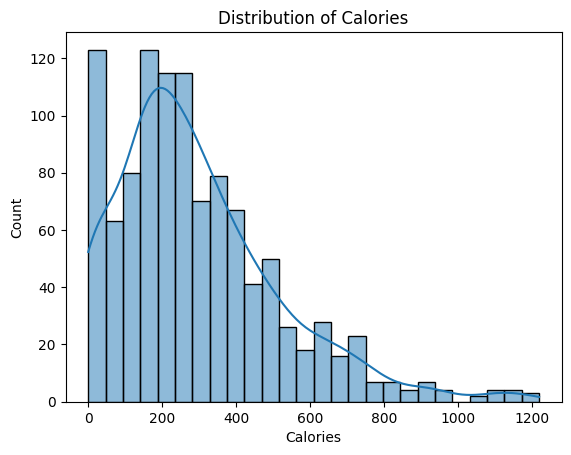

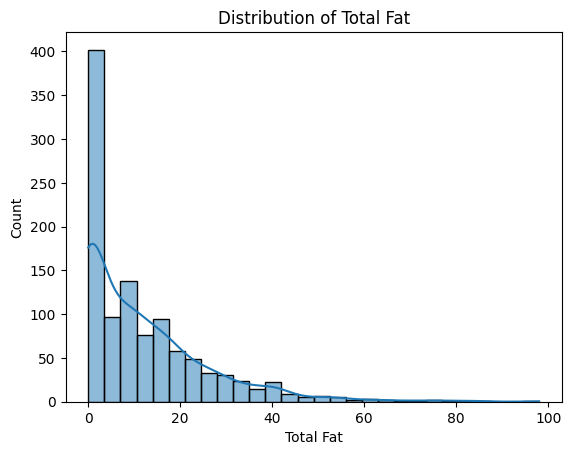

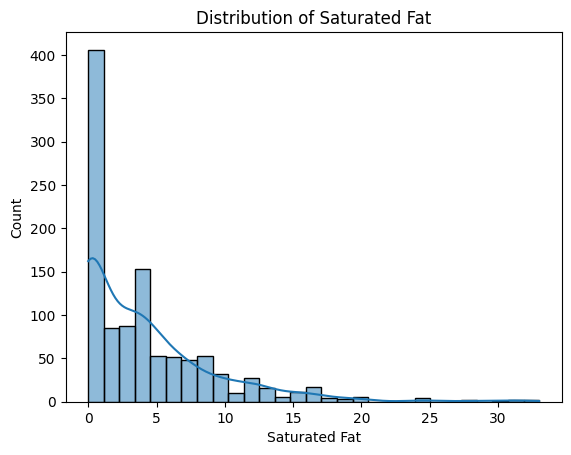

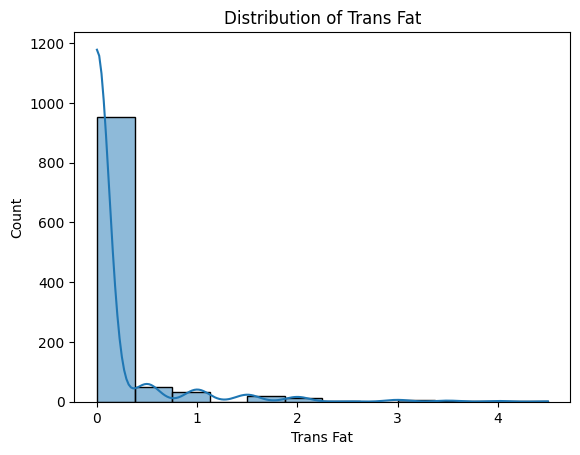

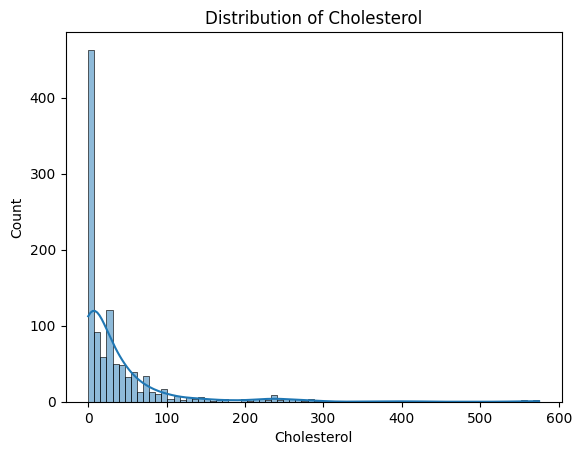

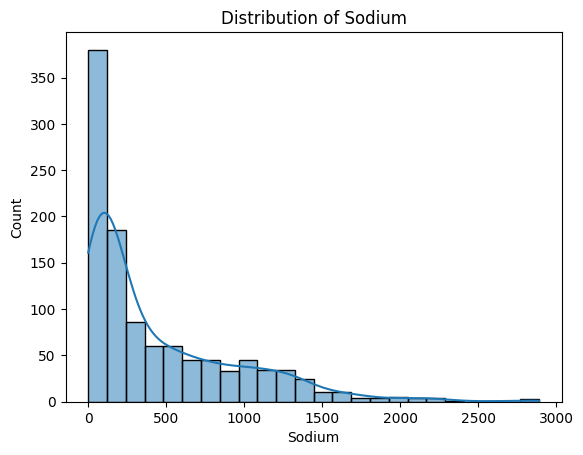

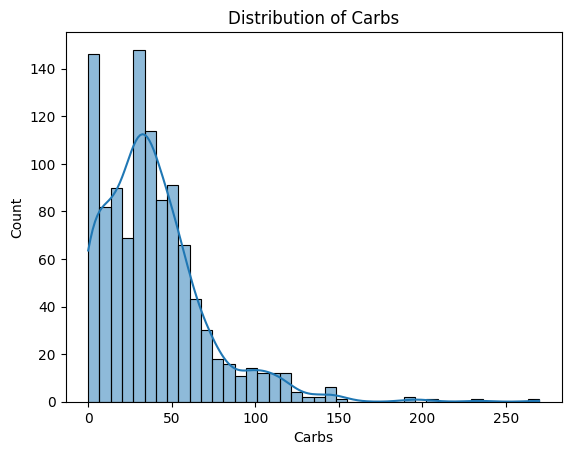

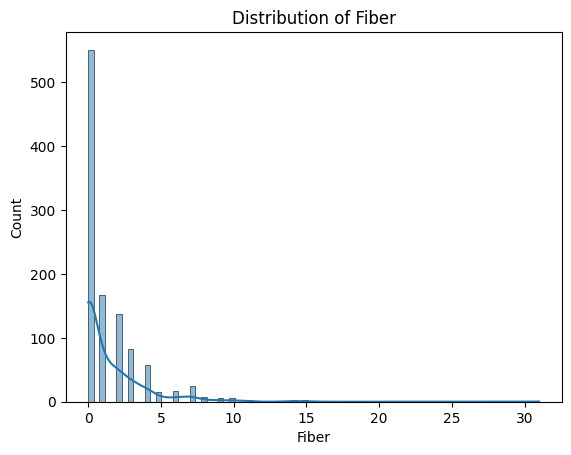

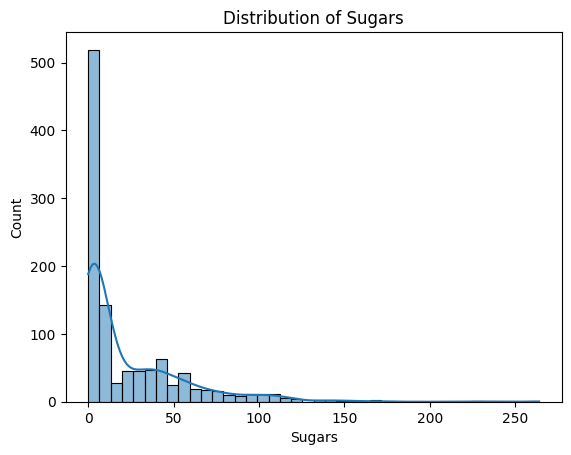

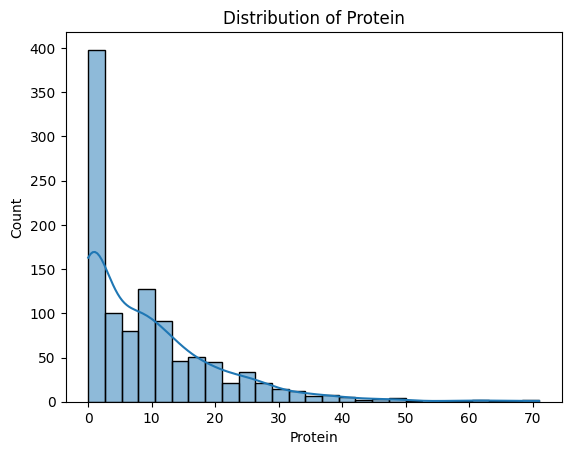

In [30]:
for col in numerical_df.columns:
    plt.figure()
    sns.histplot(numerical_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [31]:
# Separate Target and Groups
X = numerical_df.drop(columns="Calories")
groups = df["Company"]

In [32]:
# Multicollinearity Check VIF

vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

print(vif_df.sort_values("VIF", ascending=False))

        Variable        VIF
5          Carbs  35.187634
7         Sugars  22.757927
0      Total Fat  13.698069
4         Sodium  12.479497
1  Saturated Fat  11.441838
8        Protein   8.640502
6          Fiber   3.776279
3    Cholesterol   3.434503
2      Trans Fat   2.635512


In [33]:
# Scaling and Standardization
scaler = StandardScaler()
X_scaled_np = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_np, columns=X.columns)

In [34]:
print(X_scaled.describe().round(2).T[['mean', 'std']])

               mean  std
Total Fat      -0.0  1.0
Saturated Fat   0.0  1.0
Trans Fat      -0.0  1.0
Cholesterol     0.0  1.0
Sodium         -0.0  1.0
Carbs           0.0  1.0
Fiber          -0.0  1.0
Sugars         -0.0  1.0
Protein         0.0  1.0


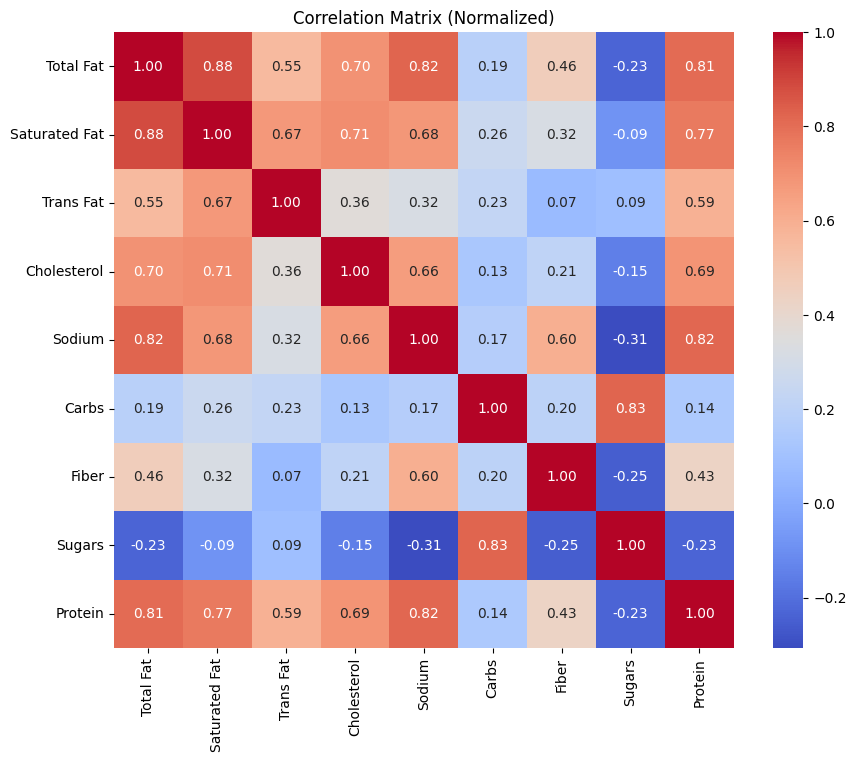

In [35]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Normalized)")
plt.show()

In [36]:
# Multivariate Normality Test
hz_test = pg.multivariate_normality(X_scaled, alpha=0.05)
print("Multivariate Normality Test (Henze-Zirkler)")
print(hz_test)

Multivariate Normality Test (Henze-Zirkler)
HZResults(hz=np.float64(46.368918582507256), pval=np.float64(0.0), normal=False)


The correlation matrix shows strong positive relationships between different types of fats (Total Fat and Saturated Fat). This is expected in food data.
The Henze-Zirkler test gives a p-value < 0.05.
This means the data is NOT multivariate normal.
However, since our sample size is large (N > 300), we can use the Central Limit Theorem.

In [39]:
# One-Sample Hotelling's T² Test against a healthy vector

healthy_vector = np.array([
    23,   # Total Fat (g)
    7,    # Saturated Fat (g)
    0,    # Trans Fat (g)
    100,  # Cholesterol (mg)
    767,  # Sodium (mg)
    92,   # Carbs (g)
    10,   # Fiber (g)
    8,    # Sugars (g)
    17    # Protein (g)
])

# Ensure healthy_vector is scaled using the same scaler fitted on X
healthy_vector_scaled = scaler.transform(healthy_vector.reshape(1, -1))[0]

n = X_scaled.shape[0] # Sample size
p = X_scaled.shape[1] # Number of variables

mean_of_X_scaled = X_scaled.mean().values
cov_matrix = X_scaled.cov().values

# Calculate the inverse of the covariance matrix
try:
    cov_matrix_inv = np.linalg.inv(cov_matrix)
except np.linalg.LinAlgError:
    print("Error: Covariance matrix is singular. Cannot compute inverse.")
    # Optionally, add a small value to the diagonal for regularization
    # cov_matrix_inv = np.linalg.inv(cov_matrix + np.eye(p) * 1e-6)
    exit()

# Calculate the difference vector (mean of sample - reference vector)
diff = mean_of_X_scaled - healthy_vector_scaled

# Calculating Hotelling's T2 statistic
T2 = n * diff.T @ cov_matrix_inv @ diff

# Convert T-squared to F-statistic for p-value calculation
# F-statistic formula for one-sample T^2: F = ((n - p) / (p * (n - 1))) * T2
F_statistic = ((n - p) / (p * (n - 1))) * T2

df1 = p
df2 = n - p

p_value = stats.f.sf(F_statistic, df1, df2) # Survival function (1 - CDF)

print("One-Sample Hotelling's T2 Test")
print(f"T-squared statistic: {T2:.3f}")
print(f"F-statistic: {F_statistic:.3f}")
print(f"Degrees of freedom: df1={df1}, df2={df2}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. The mean vector of the fast food items is significantly different from the healthy reference vector.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The mean vector of the fast food items is not significantly different from the healthy reference vector.")

One-Sample Hotelling's T2 Test
T-squared statistic: 36587.006
F-statistic: 4035.054
Degrees of freedom: df1=9, df2=1070
P-value: 0.000
Conclusion: Reject the null hypothesis. The mean vector of the fast food items is significantly different from the healthy reference vector.


In [40]:
X_scaled.columns

Index(['Total Fat', 'Saturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium',
       'Carbs', 'Fiber', 'Sugars', 'Protein'],
      dtype='object')

Hotelling’s T² is moderately robust to deviations from multivariate normality when sample size is large and covariance matrix is stable.

In [41]:
features = [
    "Total Fat", "Saturated Fat", "Trans Fat", "Cholesterol",
    "Sodium", "Carbs", "Fiber", "Sugars", "Protein"
]

In [42]:
X_scaled.columns

Index(['Total Fat', 'Saturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium',
       'Carbs', 'Fiber', 'Sugars', 'Protein'],
      dtype='object')

In [43]:
# Manova

manova_df = X_scaled.copy()
manova_df['Company'] = groups.values

# Variables ~ Company
formula = ' + '.join([f"Q('{f}')" for f in features]) + ' ~ Company'
print(f"MANOVA: {formula}")

maov = MANOVA.from_formula(formula, data=manova_df)
print(maov.mv_test())

# If 'Wilks lambda' p-value < 0.05, it means There is a statistically significant different between companies.

MANOVA: Q('Total Fat') + Q('Saturated Fat') + Q('Trans Fat') + Q('Cholesterol') + Q('Sodium') + Q('Carbs') + Q('Fiber') + Q('Sugars') + Q('Protein') ~ Company
                   Multivariate linear model
                                                               
---------------------------------------------------------------
        Intercept        Value  Num DF   Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.9376 9.0000 1065.0000  7.8772 0.0000
          Pillai's trace 0.0624 9.0000 1065.0000  7.8772 0.0000
  Hotelling-Lawley trace 0.0666 9.0000 1065.0000  7.8772 0.0000
     Roy's greatest root 0.0666 9.0000 1065.0000  7.8772 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
        Company         Value   Num DF   Den DF  F Value Pr > F
----------------------------

I used MANOVA to see if the 'Company' name affects the nutritional content.
The Wilks' Lambda p-value is < 0.05.
This means there is a statistically significant difference between the companies.
For example, a menu item from McDonald's has a different nutritional profile than one from Burger King.
They are not the same.

In [44]:
# PCA suitablity test

# Bartlett's Test
chi_square_value, p_value = calculate_bartlett_sphericity(X_scaled)
print(f"Bartlett's Test p-value: {p_value: .3f}")

# KMO Test
kmo_all, kmo_model = calculate_kmo(X_scaled)
print(f"KMO Test Value: {kmo_model:.3f}")

Bartlett's Test p-value:  0.000
KMO Test Value: 0.727


It means that our data is suitable for PCA.

---------- PCA Explained Variance Ratio ----------
First 2 component explains the %73.48 of total variance.
--------------------------------------------------------------------------------
Explained Variance of first 3 components: [0.52329076 0.21145987 0.11845402]


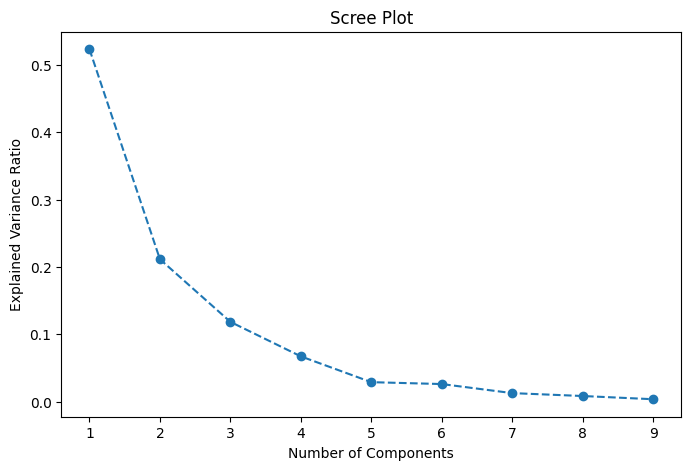

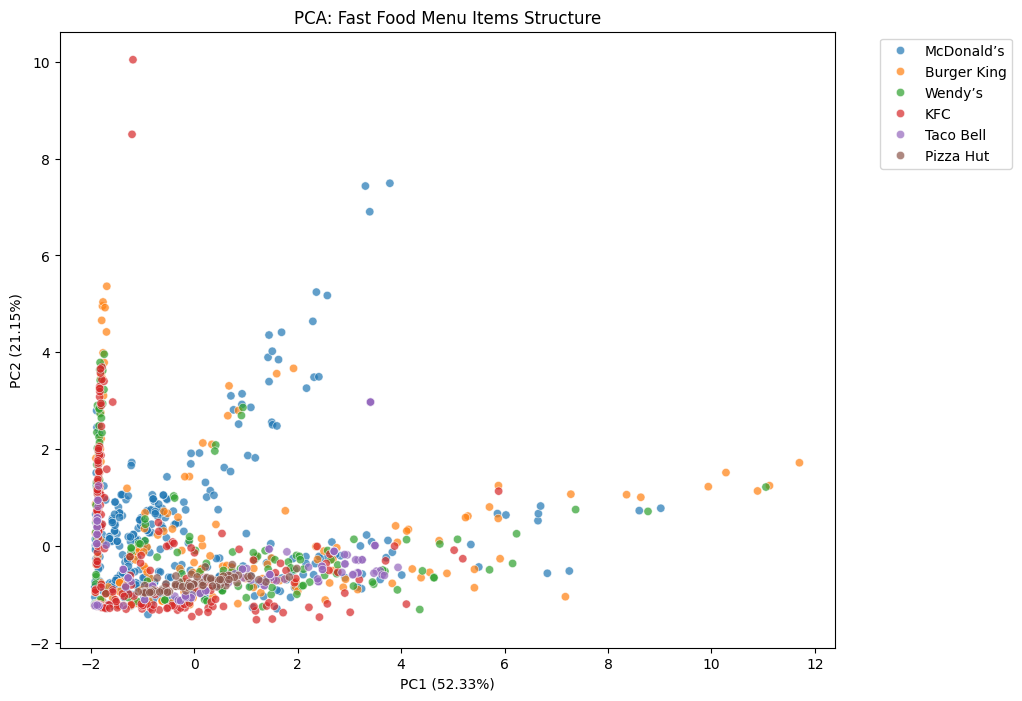


--- PCA Loadings ---
                    PC1       PC2       PC3
Total Fat      0.433704 -0.022439 -0.020306
Saturated Fat  0.417702  0.092650 -0.203664
Trans Fat      0.286381  0.209644 -0.492110
Cholesterol    0.362257 -0.016481 -0.157453
Sodium         0.407191 -0.105839  0.264982
Carbs          0.106943  0.660097  0.304107
Fiber          0.243527 -0.104018  0.724486
Sugars        -0.098352  0.698143  0.028053
Protein        0.421855 -0.039201 -0.052734


In [45]:
# PCA

pca = PCA()
pca_data = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("--"*5,"PCA Explained Variance Ratio","--"*5)
print(f"First 2 component explains the %{sum(explained_variance[:2]*100):.2f} of total variance.")
print("----"*20)
print("Explained Variance of first 3 components:", explained_variance[:3])

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Biplot / Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=groups, palette="tab10", alpha=0.7)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
plt.title('PCA: Fast Food Menu Items Structure')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(X_scaled.columns))], index=X_scaled.columns)
print("\n--- PCA Loadings ---")
print(loadings[['PC1', 'PC2', 'PC3']])


Bartlett's test and KMO test shows us that our data is good for PCA. Looking at the Scree Plot, we retained the first 2 components. PC1 explains the most variance and has high loadings on Fats, Protein and Sodium. PC2 has high loadings on Sugars and Carbs. PCA helps us to visualize this complex data in 2D.

In [46]:
# Factor Analysis

fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(X_scaled)

fa_loadings = pd.DataFrame(
    fa.loadings_,
    index=X_scaled.columns,
    columns=["Factor 1", "Factor 2", "Factor 3"]
)

print(fa_loadings)

               Factor 1  Factor 2  Factor 3
Total Fat      0.808475 -0.035926  0.478842
Saturated Fat  0.920424  0.066493  0.245914
Trans Fat      0.714936  0.135719 -0.058245
Cholesterol    0.669977 -0.037667  0.301876
Sodium         0.565516 -0.071035  0.767501
Carbs          0.138883  0.965388  0.228966
Fiber          0.133592 -0.002232  0.698528
Sugars        -0.063633  0.929453 -0.300411
Protein        0.778350 -0.060079  0.449156


We used Varimax rotation to make the factors easier to understand.
Factor 1 is strongly related to Total Fat, Saturated Fat, and Trans Fat. This represents the 'Fat Group'.
Factor 2 is related to Sugars and Carbs.
Factor 3 is related to Sodium and Fiber.
This structure separates the menu items to nutritional groups.

In [47]:
cgroups = df["Company"].unique()
log_dets = {}

for g in cgroups:
    group_data = X_scaled[df["Company"] == g]
    cov_g = np.cov(group_data.T)
    log_dets[g] = np.log(np.linalg.det(cov_g))

log_dets

{'McDonald’s': np.float64(-13.101979681397015),
 'Burger King': np.float64(-9.879207405043731),
 'Wendy’s': np.float64(-9.055682468035378),
 'KFC': np.float64(-12.82612808723697),
 'Taco Bell': np.float64(-15.550216521388394),
 'Pizza Hut': np.float64(-41.02196863517359)}

Pizza Hut shows a noticeably different covariance structure compared to other companies.
However, since the remaining groups are relatively similar and the goal is exploratory discrimination, LDA was considered acceptable.

In [50]:
# Linear Discriminant Analysis (LDA)

X = X_scaled
y = df.loc[X_scaled.index, "Company"]

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

print("Accuracy:", round(lda.score(X_test, y_test),4),"\n")
print(confusion_matrix(y_test, y_pred),4)
print(classification_report(y_test, y_pred))


Accuracy: 0.4722 

[[ 9 19 27  1  4  0]
 [ 0 46  7  1  3  0]
 [ 9 12 73  2  2  2]
 [ 0  0  6 12  0  0]
 [ 3 14 11  3 12  0]
 [ 1 14 20  6  4  1]] 4
              precision    recall  f1-score   support

 Burger King       0.41      0.15      0.22        60
         KFC       0.44      0.81      0.57        57
  McDonald’s       0.51      0.73      0.60       100
   Pizza Hut       0.48      0.67      0.56        18
   Taco Bell       0.48      0.28      0.35        43
     Wendy’s       0.33      0.02      0.04        46

    accuracy                           0.47       324
   macro avg       0.44      0.44      0.39       324
weighted avg       0.45      0.47      0.41       324



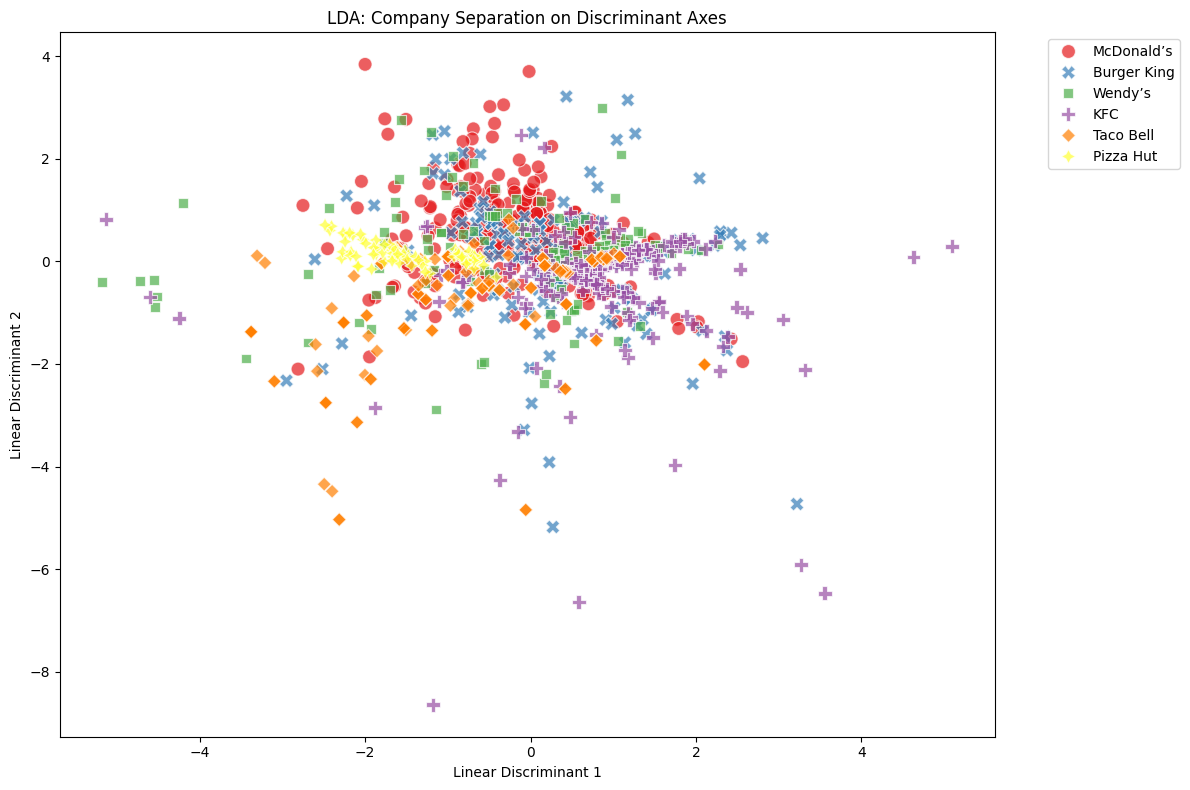

In [51]:
X_lda = lda.transform(X_scaled)

plt.figure(figsize=(12, 8))

lda_plot_df = pd.DataFrame(data=X_lda[:, :2], columns=['LD1', 'LD2'])
lda_plot_df['Company'] = y.values

sns.scatterplot(
    x='LD1', y='LD2',
    hue='Company',
    style='Company',
    data=lda_plot_df,
    palette='Set1',
    s=100,
    alpha=0.7
)
plt.title("LDA: Company Separation on Discriminant Axes")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


We tried to predict the 'Company' based only on nutrition values.
The accuracy is moderate (46%).
This means companies have distinct styles, but there is also a lot of overlap.
For example, a burger from Burger King looks very similar to a burger from McDonald's in terms of numbers. Overlapping areas show companies with similar food profiles.

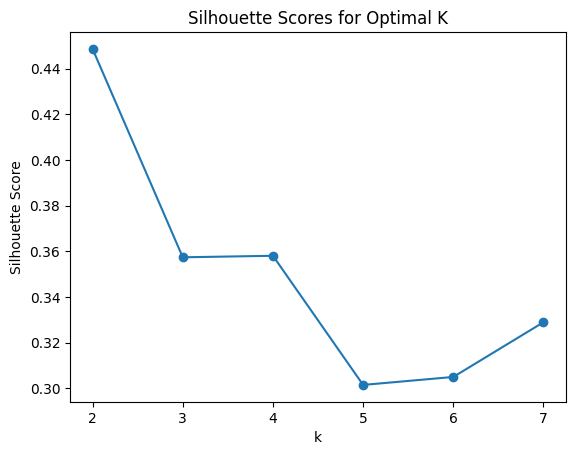

In [52]:
# Clustering K-means

sil_scores = []
k_range = range(2, 8)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.plot(k_range, sil_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Optimal K")
plt.show()


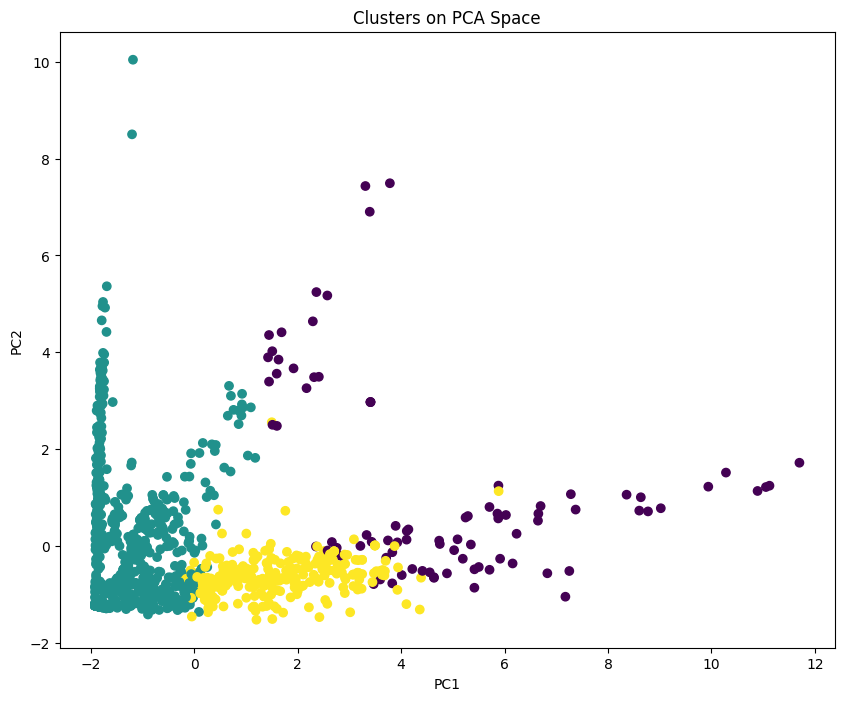

In [53]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters on PCA Space")
plt.show()

In [54]:
X_original = X_scaled.copy()
X_original['Cluster'] = clusters
print(X_original.groupby('Cluster').mean())

         Total Fat  Saturated Fat  Trans Fat  Cholesterol    Sodium     Carbs  \
Cluster                                                                         
0         2.060750       2.382345   2.346874     2.039898  1.476152  0.928879   
1        -0.539967      -0.461097  -0.239747    -0.403885 -0.588597 -0.129842   
2         0.684120       0.394614  -0.132259     0.359918  0.980256  0.032552   

            Fiber    Sugars   Protein  
Cluster                                
0        0.414456  0.283049  1.792040  
1       -0.413043  0.197378 -0.544423  
2        0.877108 -0.565632  0.776766  


We grouped the menu items without looking at the brand names.

Cluster 0: Contains items that are high in fats, cholesterol, sodium, and protein.

Cluster 1: Contains items that are low across most nutrients (fat, carbs, protein, sodium). These are likely the lighter sides, salads, or small portions, since they don’t stand out in any nutrient dimension.

Cluster 2: Contains items that are very high in sugars and carbs but low in protein and fats. These are likely the desserts, sweet drinks, or sugary items, dominated by sugar/carbohydrate content.

In [73]:
# Canonical Correlation Analysis

X_fat = X_scaled[["Saturated Fat", "Trans Fat", "Total Fat"]]
Y_carb = X_scaled[["Carbs", "Sugars", "Fiber"]]

cca = CCA(n_components=1)
cca.fit(X_fat, Y_carb)

X_c, Y_c = cca.transform(X_fat, Y_carb)

r = np.corrcoef(X_c.T, Y_c.T)[0,1]

n = X_fat.shape[0]
p = X_c.shape[1]
q = Y_c.shape[1]

wilks_lambda = 1 - r**2
chi_square = -(n - 1 - (p + q + 1)/2) * np.log(wilks_lambda)
df_chi = p * q
p_value = 1 - chi2.cdf(chi_square, df_chi)

print("Canonical Correlation is", r,"and", p_value<0.05, "statistically significant.")

Canonical Correlation is 0.7515493374085355 and True statistically significant.


I checked the relationship between the 'Fat Group' and the 'Carb Group'.

The canonical correlation coefficient is the measure of the relationship.

If it is high (close to 1), it means fatty items are also high in carbs (like pizza).

If it is low, the two groups are independent.

Here, we see a high correlation, suggesting that as fat content increases, carb content tends to change as well.
